In [1]:
from MusicRetrieval import MRI
audiopath = 'song&samples/gamme_C.wav'
_80_bpm = "test/80bpm.wav"
import librosa as lb
import matplotlib.pyplot as plt
import numpy as np
import scipy
from IPython.display import Audio


In [2]:
sample, sr = lb.load(audiopath)
D = lb.stft(sample)


# find wich note is played when

In [3]:
D_harmonic, D_percussive = lb.decompose.hpss(D)

In [4]:
iD_harmonic = lb.istft(D_harmonic)
iD_percussive = lb.istft(D_percussive)
tempo, beat = lb.beat.beat_track(y=iD_percussive, sr=sr)
iD_percussive

array([ 7.7698283e-09,  3.0414053e-08, -8.4386222e-08, ...,
       -6.0428609e-04, -1.3932734e-03, -1.5942863e-03], dtype=float32)

In [5]:
chroma_harm = lb.feature.chroma_cqt(y=iD_harmonic, sr=sr,cqt_mode="hybrid", threshold=1.3, hop_length=1382)
chroma_filter = np.minimum(chroma_harm,lb.decompose.nn_filter(chroma_harm,aggregate=np.median,metric='cosine'))
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))

In [6]:
len(iD_harmonic)
Audio(iD_harmonic, rate=sr)

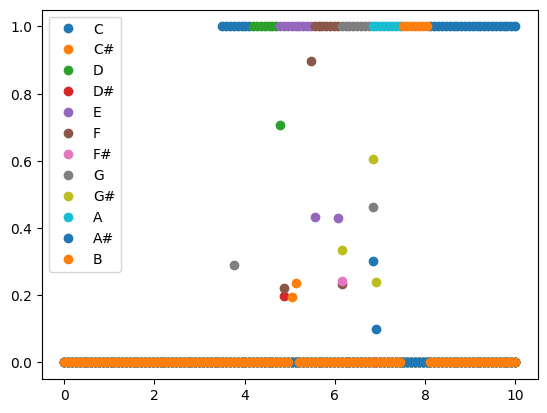

In [7]:
# dimension 1 -> note de C à B
# dimension 2 -> 
notes = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]




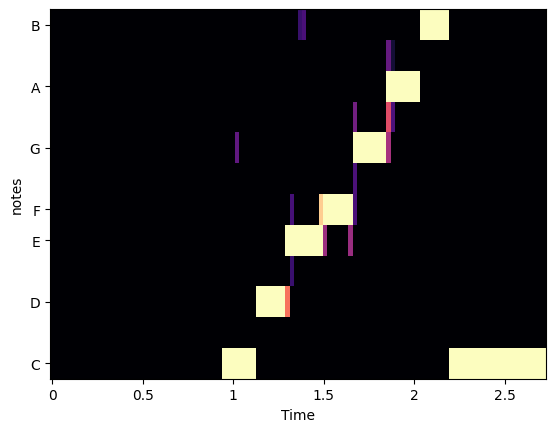

In [10]:
fig, ax = plt.subplots(nrows=1)
lb.display.specshow(chroma_harm, y_axis='chroma', x_axis='time', ax=ax)
ax.set(ylabel="notes")
ax.label_outer()


# Use percussive part of the signal to extract the time rythm information

In [13]:
ratio = lb.feature.tempogram_ratio(y=iD_percussive, sr=sr, bpm=tempo.item())

In [19]:
ratio.size

4134

In [33]:
pitches, magnitudes = lb.piptrack(y=iD_harmonic, sr=sr,fmax=3000)

In [63]:
def 

1025